### KRUNAL PANCHAL (student/data analyst)

# <center>Indian Restaurant Probe</center>
Web-Scraping, Foursquare API, Folium
Map & Machine Learning

### Introduction

In this project, we will proceed with the step by step analysis of the
neighbourhoods of Toronto in order to find insights for the best
suitable place to open an Indian Restaurant. Toronto shelter a greater
number of Indians than any other city in Canada, so it is a good idea to
start the restaurant here, but we just need to make sure whether it is a
profitable idea or not. If so, where we can place it, so it yields more
profit to the owner

### Downloading and Exploring Dataset

In [1]:
import numpy as np 
import pandas as pd  
import codecs
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
page = urlopen(r'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [3]:
bsobj = BeautifulSoup(page, 'lxml')

In [4]:
table = bsobj.table

In [9]:
table_contents=[]
table=bsobj.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

In [10]:
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [12]:
df = df[df['Borough'] != "Not assigned"].reset_index(drop=True)

In [13]:
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [14]:
df['Borough'].value_counts()

North York                24
Downtown Toronto          17
Scarborough               17
Etobicoke                 11
Central Toronto            9
West Toronto               6
York                       5
East Toronto               4
East York                  4
Mississauga                1
East York/East Toronto     1
Etobicoke Northwest        1
Downtown Toronto Stn A     1
East Toronto Business      1
Queen's Park               1
Name: Borough, dtype: int64

In [15]:
df['Neighborhood'].value_counts()

Milliken, Agincourt North, Steeles East, L'Amoreaux East                                          1
Woburn                                                                                            1
Roselawn                                                                                          1
Caledonia-Fairbanks                                                                               1
Parkwoods                                                                                         1
                                                                                                 ..
Agincourt                                                                                         1
Kensington Market, Chinatown, Grange Park                                                         1
Humberlea, Emery                                                                                  1
Mimico NW, The Queensway West, South of Bloor, Kingsway Park South West, Royal York South West    1


#### we can see , there are 0 not assigned values. So there is not need to replace the data.

In [17]:
df_coordinates = pd.read_csv('Geospatial_Coordinates.csv')

In [18]:
df_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [19]:
df_coordinates.rename(columns={'Postal Code':'PostalCode'}, inplace=True)

In [20]:
df_data = pd.merge(df, df_coordinates, on='PostalCode')

In [21]:
df_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


### Explore Neighborhoods in Toronto

In [22]:
CLIENT_ID = 'F3UR4QMHXX30GW3PRMQVUZ2YVUTZHN2XENW2M41TZEJRVSB2' # your Foursquare ID
CLIENT_SECRET = 'N2IJN4U3WBEP0W1K2UIGRCG1ZNOKAO5M1IDNPA0ACBPOEV1U' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: F3UR4QMHXX30GW3PRMQVUZ2YVUTZHN2XENW2M41TZEJRVSB2
CLIENT_SECRET:N2IJN4U3WBEP0W1K2UIGRCG1ZNOKAO5M1IDNPA0ACBPOEV1U


In [33]:
radius=1000
latitude = 43.628841
longitude = -79.520999
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius)
results = requests.get(url).json()


In [35]:
results

{'meta': {'code': 200, 'requestId': '60c6325b412fbb3a570bd437'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Islington - City Centre West',
  'headerFullLocation': 'Islington - City Centre West, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 55,
  'suggestedBounds': {'ne': {'lat': 43.63784100900001,
    'lng': -79.50858825227034},
   'sw': {'lat': 43.61984099099999, 'lng': -79.53340974772966}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bc9f9b6b6c49c7469688f91',
       'name': 'South St. Burger',
       'location': {'address': '1020 Islington Ave',
        'lat': 43.63131374571208,
        'lng': -79.51840794740386,
        'labeledLatLngs': [{

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
import json 
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium 

In [34]:
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-34-0a6ee96164a4>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,South St. Burger,Burger Joint,43.631314,-79.518408
1,Wingporium,Wings Joint,43.630275,-79.518169
2,Moksha Yoga Etobicoke,Yoga Studio,43.622672,-79.519478
3,Power Yoga Canada Etobicoke,Yoga Studio,43.636592,-79.520312
4,Fat Bastard Burrito Co.,Burrito Place,43.622099,-79.521880


In [25]:
latitude = 43.628841
longitude = -79.520999


# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_data['Latitude'], df_data['Longitude'], df_data['Borough'], df_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [37]:
LIMIT = 100
toronto_venues = getNearbyVenues(names=df_data['Neighborhood'],
                                   latitudes=df_data['Latitude'],
                                   longitudes=df_data['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

In [41]:
print(toronto_venues.shape)
toronto_venues.head()

(1992, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
1,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [42]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",7,7,7,7,7,7
"Bathurst Manor, Wilson Heights, Downsview North",16,16,16,16,16,16
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
...,...,...,...,...,...,...
Willowdale West,5,5,5,5,5,5
"Willowdale, Newtonbrook",1,1,1,1,1,1
Woburn,5,5,5,5,5,5


In [43]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 263 uniques categories.


There are 263 unique categories in which Indian Restaurant is one of them. We will do one hot encoding for getting dummies of venue category. So that we will calculate mean of all venue groupby there neighborhoods.

### Analyze each neighbourhood for Indian Restaurant

In [44]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Willowdale West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,"Willowdale, Newtonbrook",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
print (toronto_venues['Venue Category'].value_counts())

Coffee Shop                   202
Café                           93
Sandwich Place                 88
Pizza Place                    49
Park                           49
                             ... 
Wine Shop                       1
Baby Store                      1
Construction & Landscaping      1
Camera Store                    1
Skate Park                      1
Name: Venue Category, Length: 263, dtype: int64


In [46]:
toronto_part = toronto_grouped[['Neighborhood', 'Indian Restaurant']]
toronto_part

,Neighborhood,Indian Restaurant
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.043478
...,...,...
95,Willowdale West,0.000000
96,"Willowdale, Newtonbrook",0.000000
97,Woburn,0.000000
98,Woodbine Heights,0.000000


In [67]:
toronto_merged = pd.merge(df_data, toronto_part, on='Neighborhood')
toronto_merged

,Borough,PostalCode,Neighborhood,Cluster Labels,Indian Restaurant
0,Central Toronto,M4N,Lawrence Park,0,0.000000
1,Central Toronto,M4P,Davisville North,0,0.000000
2,Central Toronto,M4R,North Toronto West,0,0.000000
3,Central Toronto,M4S,Davisville,3,0.035714
4,Central Toronto,M4T,"Moore Park, Summerhill East",0,0.000000
...,...,...,...,...,...
95,York,M6C,Humewood-Cedarvale,0,0.000000
96,York,M6E,Caledonia-Fairbanks,0,0.000000
97,York,M6M,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",0,0.000000
98,York,M6N,"Runnymede, The Junction North",0,0.000000


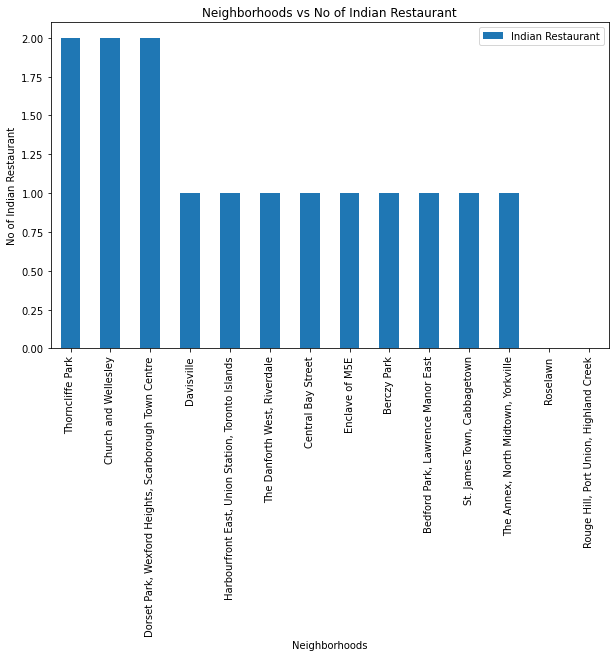

In [54]:
import matplotlib.pyplot as plt
graph = pd.DataFrame(toronto_onehot.groupby('Neighborhood')['Indian Restaurant'].sum())
graph = graph.sort_values(by ='Indian Restaurant', ascending=False)
graph.iloc[:14].plot(kind='bar', figsize=(10,6))
plt.xlabel("Neighborhoods")
plt.ylabel("No of Indian Restaurant")
plt.title("Neighborhoods vs No of Indian Restaurant")
plt.show()

### 

### Cluster Neighborhoods 

Using elbow method , we can see that K=6 is the best value